# Universidad del Valle de Guatemala
# (CC3078) Cifrado de Información
# Laboratorio 2 - Base64 y XOR

Miembros del equipo de trabajo:
- Gabriel Alejandro Vicente Lorenzo (20498)
- Santiago Taracena Puga (20017)

## Laboratorio 2 - Inciso 9

Dada una cadena de bits X (por ejemplo, una que priviene de convertir un texto a bits). Calcular la distribución de probabilidad de ocurrencia de sus bits 0 y 1, y mostrarlo en un histograma. Repetir lo mismo para bigrama sy trigramas. ¿Qué ocurre con la distribución de probabilidades?

Lo primero que necesitamos realizar con el objetivo de cumplir las instrucciones del presente inciso del laboratorio es importar las librerías necesarias. Para poder tener una cadena de bits larga y útil para probar vamos a usar Base64 para obtener la cadena respectiva a la imagen utilizada en los anteriores incisos, y también utilizaremos matplotlib para graficar los resultados que vayamos obteniendo.

In [45]:
# Librerías necesarias para realizar el inciso.
import base64
import matplotlib.pyplot as plt

Luego de importar las librerías mencionadas, procedemos con la lectura de los bits de la imagen. Esto se realiza de la misma forma que se realizó anteriormente en el laboratorio.

In [56]:
# Obtención del número binario a probar.
cipher_image: bytes = open("./out/result.png", "rb").read()
cipher_image_base64_encoded: str = base64.b64encode(cipher_image).decode("utf-8")
cipher_image_base64_decoded: bytes = base64.b64decode(cipher_image_base64_encoded)
cipher_image_bytes: list[str] = [format(cipher_image_base64_decoded[i], "08b") for i in range(len(cipher_image_base64_decoded))]
binary_number: str = str().join(cipher_image_bytes)
binary_number[0: 250]

'1000100101010000010011100100011100001101000010100001101000001010000000000000000000000000000011010100100101001000010001000101001000000000000000000000010001100000000000000000000000000010111010110000100000000110000000000000000000000000101100011010100111'

Posteriormente, necesitamos escribir una función que sea capaz de contar las cantidades de apariciones que tienen los bits mencionados. Esta función tiene qué tener la capacidad de devolvernos un resultado graficable de la cuenta de los dígitos observados.

In [47]:
# Función count_bits, que cuenta los bits del número.
def count_bits(binary_number: str) -> dict[str, int]:

    # Bits iniciales a contar.
    bits: dict[str, int] = { "0": 0, "1": 0 }

    # Ciclo que realiza toda esta cuenta de bits necesaria.
    for i in range(len(binary_number)):
        current_bit: str = bits[i]
        if (current_bit in bits):
            bits[current_bit] += 1

    # Retorno de la cuenta obtenida.
    return bits

Con esta función finalizada, podemos llamarla para obtener la cantidad de bits en la cadena brindada. Este resultado finalmente lo podemos graficar para observar cómo la probabilidad de encontrar uno de los dos bits tiende a ser 50% - 50% entre más larga es la cadena que se está utilizando.

In [48]:
# Resultados obtenidos.
results: dict[str, int] = count_bits(binary_number)
results

{'0': 1424188, '1': 1421028}

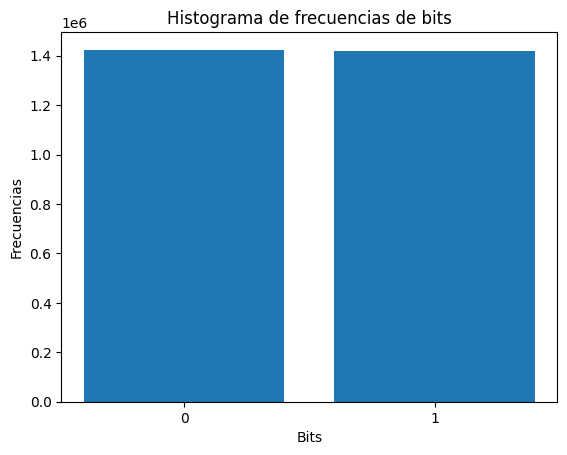

In [49]:
# Bits y cuentas a graficar.
bits, counts = list(results.keys()), list(results.values())

# Histograma realizado.
plt.bar(bits, counts)
plt.xlabel("Bits")
plt.ylabel("Frecuencias")
plt.title("Histograma de frecuencias de bits")
plt.show()

Posteriormente tenemos qué realizar una función que, en lugar de contar dígitos individuales, cuente bigramas presentes en la cadena.

In [50]:
# Función count_bigrams, que cuenta los bigramas del número.
def count_bigrams(binary_number: str) -> dict[str, int]:

    # Bigramas iniciales a contar.
    bigrams: dict[str, int] = { "00": 0, "01": 0, "10": 0, "11": 0 }

    # Ciclo que realiza toda esta cuenta de bigramas necesaria.
    for i in range(0, len(binary_number) - 1, 2):
        current_bigram: str = binary_number[i: i + 2]
        if (current_bigram in bigrams):
            bigrams[current_bigram] += 1

    # Retorno de la cuenta obtenida.
    return bigrams

Con esta función finalizada, podemos llamarla para obtener la cantidad de bigramas en la cadena brindada. Este resultado finalmente lo podemos graficar para observar cómo la probabilidad de encontrar uno de los cuatro bigramas tiende a ser 25% cada una entre más larga es la cadena que se está utilizando.

In [51]:
# Resultados obtenidos.
results: dict[str, int] = count_bigrams(binary_number)
results

{'00': 356270, '01': 353415, '10': 358233, '11': 354690}

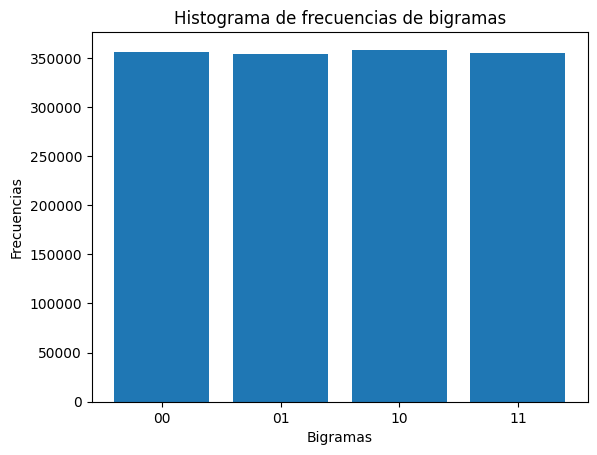

In [52]:
# Bigramas y cuentas a graficar.
bigrams, counts = list(results.keys()), list(results.values())

# Histograma realizado.
plt.bar(bigrams, counts)
plt.xlabel("Bigramas")
plt.ylabel("Frecuencias")
plt.title("Histograma de frecuencias de bigramas")
plt.show()

Finalmente, la última función que necesitamos escribir es la que es capaz de contar los trigramas que se encuentran disponibles en el número binario.

In [53]:
# Función count_trigrams, que cuenta los trigramas del número.
def count_trigrams(binary_number: str) -> dict[str, int]:

    # Trigramas iniciales a contar.
    trigrams: dict[str, int] = { "000": 0, "001": 0, "010": 0, "011": 0, "100": 0, "101": 0, "110": 0, "111": 0 }

    # Ciclo que realiza toda esta cuenta de trigramas necesaria.
    for i in range(0, len(binary_number) - 2, 3):
        current_trigram: str = binary_number[i: i + 3]
        if (current_trigram in trigrams):
            trigrams[current_trigram] += 1

    # Retorno de la cuenta obtenida.
    return trigrams

Con esta función finalizada, podemos llamarla para obtener la cantidad de trigramas en la cadena brindada. Este resultado finalmente lo podemos graficar para observar cómo la probabilidad de encontrar uno de los ocho trigramas tiende a ser 12.5% entre más larga es la cadena que se está utilizando.

In [54]:
# Resultados obtenidos.
results: dict[str, int] = count_trigrams(binary_number)
results

{'000': 119074,
 '001': 119305,
 '010': 118179,
 '011': 117747,
 '100': 118680,
 '101': 118069,
 '110': 118821,
 '111': 118530}

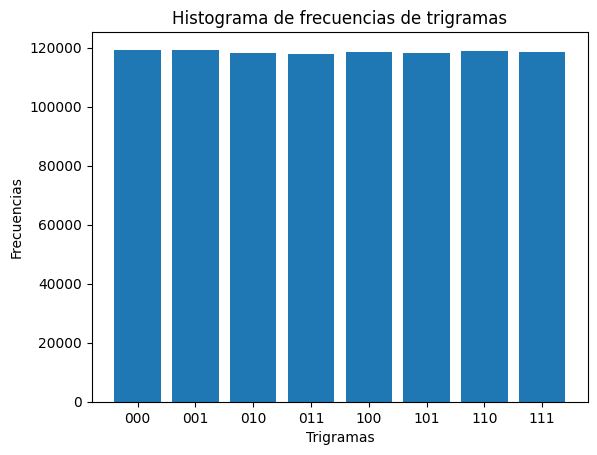

In [55]:
# Trigramas y cuentas a graficar.
trigrams, counts = list(results.keys()), list(results.values())

# Histograma realizado.
plt.bar(trigrams, counts)
plt.xlabel("Trigramas")
plt.ylabel("Frecuencias")
plt.title("Histograma de frecuencias de trigramas")
plt.show()

En conclusión, al realizar el ejercicio de contar bigramas y trigramas en una cadena de bits, hemos explorado cómo analizar la distribución de secuencias de bits dentro de datos binarios. Mediante el uso de funciones simples pero efectivas en Python, pudimos identificar la frecuencia de aparición de diferentes combinaciones de bits, lo que nos proporciona una comprensión más profunda de la estructura y patrones presentes en la cadena de bits. Estas técnicas son fundamentales en el análisis de datos binarios y pueden ser aplicadas en una variedad de contextos, desde el procesamiento de señales digitales hasta la criptografía y la compresión de datos.

En adición, resulta interesante destacar que al analizar la distribución de bigramas y trigramas en una cadena de bits de longitud finita, podemos observar cómo las frecuencias de cada combinación tienden a estabilizarse. Sin embargo, es importante tener en cuenta que al considerar una cadena de bits de longitud infinita, las probabilidades de cada combinación tienden a igualarse, lo que sugiere una distribución más uniforme. Este fenómeno es relevante en el estudio de la teoría de la información y nos brinda una perspectiva sobre cómo evolucionan las frecuencias de aparición de los patrones en datos binarios a medida que la longitud de la cadena aumenta hacia el infinito.